In [ ]:
'''
一些 tf2 函数复习
tf.range(1,n,dtype = float32)：[1,n)，类型是float32
tf.random.normal(shape=[T],mean = 0,stddev=0.2)：输出张量的形状，%%latex态分布的均值，正态分布的标准差。
tf.Variable(tf.zeros((A,B)))：zeros的里面只填形状，默认类型为tf.float32
tf.Variable.assign(x[i])：更改tf变量的值.改成x[i].
tf.reshape(x[tau:], (-1, 1)) ：x[]是待改变的变量，(-1,1)前边的-1代表舍弃这一维。这x[]改变后变成一列。
'''

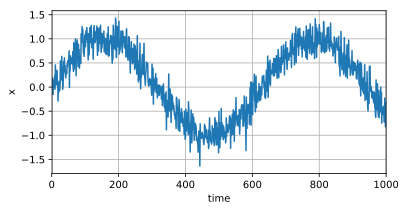

In [1]:
import tensorflow as tf
from d2l import tensorflow as d2l

T = 1000  # 总共产生1000个点
time = tf.range(1, T + 1, dtype=tf.float32) # 生成一个数组
# print(time)

# tf.random_normal()函数用于从“服从指定正态分布的序列”中随机取出指定个数的值。
#   shape: 输出张量的形状，必选
#   mean: 正态分布的均值，默认为0
#   stddev: 正态分布的标准差，默认为1.0
x = tf.sin(0.01 * time) + tf.random.normal([T], 0, 0.2) # tf.sin（从0到1，1000个维度），后面是正态噪声

#画图
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [2]:
tau = 4
features = tf.Variable(tf.zeros((T - tau, tau))) # zeros(shape，数据类型默认float32)，这里是zeros(996,4)
for i in range(tau):
    features[:, i].assign(x[i: T - tau + i]) # assign()是改变variable值的方法。且自动转置！x[0~996]\[1~997]\...\[3~999]
# reshape(要变的变量，形状)
# 其中形狀的(-1)表示舍弃这一维。这里的(-1,1)表示只有一列。

# print('x[tau:]_original:',x[tau:]) # 变化前的shape=(996,)
labels = tf.reshape(x[tau:], (-1, 1)) 
# print('after:',labels) # 变化后的shape = (996,1)

# 只使用前600个进行训练
batch_size, n_train = 16, 600 # 分了16份
# 只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)



x[tau:]_original: tf.Tensor(
[ 6.87346086e-02  9.18463618e-03  1.30494252e-01 -3.24546546e-03
  2.34534234e-01 -4.61491346e-02  4.58090603e-01  6.13582321e-02
  4.62174863e-02  2.49237627e-01  3.45003307e-01  3.34071517e-01
  4.32760119e-02  1.06727019e-01 -2.89377928e-01  9.44252983e-02
 -1.10427037e-01 -5.81192970e-02  1.24750197e-01 -7.10981339e-02
  5.74288815e-02  5.41936696e-01  3.26057941e-01  1.98359266e-01
  1.50293574e-01  6.36303782e-01  3.06691796e-01  2.65964687e-01
 -4.62365448e-02  2.49862373e-02  3.04948121e-01  5.30662000e-01
  3.68230671e-01  6.05170071e-01  3.12451094e-01  4.44263428e-01
  2.76097775e-01  1.89689547e-01  3.27239513e-01  3.08579713e-01
  2.72946119e-01  4.79954898e-01  4.14872199e-01  5.45497179e-01
  5.27046978e-01  5.10664225e-01  6.12035930e-01  7.50206053e-01
 -1.01135969e-02  4.85973984e-01  3.36368769e-01  6.47307813e-01
  5.42121410e-01  6.04090929e-01  4.86874312e-01  5.64754426e-01
  4.83319521e-01  4.73827124e-01  7.36223519e-01  4.11289871e

In [ ]:
# 一个简单的多层感知机（两个全连层）
def get_net():
    net = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='relu'), # 输出空间是10维
                              tf.keras.layers.Dense(1)])
    return net

# 最小均方损失。注意：MeanSquaredError计算平方误差时不带系数1/2
loss = tf.keras.losses.MeanSquaredError()

In [ ]:
def train(net, train_iter, loss, epochs, lr):
    trainer = tf.keras.optimizers.Adam()
    for epoch in range(epochs):
        for X, y in train_iter:
            with tf.GradientTape() as g:
                out = net(X)
                l = loss(y, out)
                params = net.trainable_variables
                grads = g.gradient(l, params)
            trainer.apply_gradients(zip(grads, params))
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)